## UCI Adult Income Dataset - Exploratory and Descriptive Analysis 
 This notebook is focused on the data preparation, cleaning and preprocessing for the UCI Adult Income Dataset

## Import the Libralies

In [1]:
# import libraries
import pandas as pd 
import numpy as np
import os
import plotly.colors as colors 
import plotly.express as px

## Define The Working Directory

In [2]:
# Get working directory
current_dir= os.getcwd()
# Go one directory up to the root directory 
project_root_dir= os.path.dirname(current_dir)
data_dir = os.path.join(project_root_dir,'data')
raw_dir = os.path.join(data_dir,'raw')
processed_dir = os.path.join(data_dir,'processed')
# define path to result folder
result_dir=os.path.join(project_root_dir,'result')
# define path to docs folder
docs_dir=os.path.join(project_root_dir,'docs')

# create directory if they do not exist 
os.makedirs(raw_dir, exist_ok = True)
os.makedirs(processed_dir, exist_ok = True)
os.makedirs(result_dir, exist_ok = True)
os.makedirs(docs_dir, exist_ok = True)

## Read in the data

In [3]:
adult_data_filename = os.path.join(processed_dir,"adult_cleaned.csv")
adult_df = pd.read_csv(adult_data_filename)
adult_df.head(10)

,age,workclass,fnlwgt,education_num,martial_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income,education_level,occupation_grouped,native_region,age_group
0,39,state-gov,77516,13,single,single,white,male,2174,0,40,<=50k,tertiary,white collar,north america,36-45
1,50,self-emp-not-inc,83311,13,married,male spouse,white,male,0,0,13,<=50k,tertiary,white collar,north america,46-60
2,38,private,215646,9,divorced or separated,single,white,male,0,0,40,<=50k,high school graduate,blue collar,north america,36-45
3,53,private,234721,7,married,male spouse,black,male,0,0,40,<=50k,secondary,blue collar,north america,46-60
4,28,private,338409,13,married,female spouse,black,female,0,0,40,<=50k,tertiary,white collar,central america,26-35
5,37,private,284582,14,married,female spouse,white,female,0,0,40,<=50k,tertiary,white collar,north america,36-45
6,49,private,160187,5,divorced or separated,single,black,female,0,0,16,<=50k,secondary,service,central america,46-60
7,52,self-emp-not-inc,209642,9,married,male spouse,white,male,0,0,45,>50k,high school graduate,white collar,north america,46-60
8,31,private,45781,14,single,single,white,female,14084,0,50,>50k,tertiary,white collar,north america,26-35
9,42,private,159449,13,married,male spouse,white,male,5178,0,40,>50k,tertiary,white collar,north america,36-45


## Check the shape of the dataset and datatypes

In [4]:
adult_df.shape

(32514, 16)

In [5]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32514 entries, 0 to 32513
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32514 non-null  int64 
 1   workclass           30678 non-null  object
 2   fnlwgt              32514 non-null  int64 
 3    education_num      32514 non-null  int64 
 4   martial_status      32514 non-null  object
 5   relationship        32514 non-null  object
 6   race                32514 non-null  object
 7   sex                 32514 non-null  object
 8   capital_gain        32514 non-null  int64 
 9   capital_loss        32514 non-null  int64 
 10  hours_per_week      32514 non-null  int64 
 11  income              32514 non-null  object
 12  education_level     32514 non-null  object
 13  occupation_grouped  30671 non-null  object
 14  native_region       31933 non-null  object
 15  age_group           32514 non-null  object
dtypes: int64(6), object(10

## Summary Statistics
## Numerical Variables 

In [6]:
adult_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32514.000000,3.251400e+04,32514.000000,32514.000000,32514.000000,32514.000000
mean,38.589746,1.897964e+05,10.081626,1079.206619,87.430030,40.440949
std,13.639033,1.055780e+05,2.571975,7390.514416,403.237687,12.349994
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178330e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370615e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Categorical Variable 

In [7]:
adult_df.describe(include='object')

,workclass,martial_status,relationship,race,sex,income,education_level,occupation_grouped,native_region,age_group
count,30678,32514,32514,32514,32514,32514,32514,30671,31933,32514
unique,8,4,5,5,2,2,7,4,5,7
top,private,married,male spouse,white,male,<=50k,high school graduate,white collar,north america,26-35
freq,22650,14984,13178,27772,21758,24678,10484,16533,30019,8501


In [8]:
adult_df['workclass'].value_counts()

workclass
private             22650
self-emp-not-inc     2540
local-gov            2093
state-gov            1298
self-emp-inc         1116
federal-gov           960
without-pay            14
never-worked            7
Name: count, dtype: int64

In [9]:
adult_df['workclass'].value_counts(normalize=True)

workclass
private             0.738314
self-emp-not-inc    0.082795
local-gov           0.068225
state-gov           0.042310
self-emp-inc        0.036378
federal-gov         0.031293
without-pay         0.000456
never-worked        0.000228
Name: proportion, dtype: float64

In [31]:
adult_df['martial_status'].value_counts(normalize=True)

martial_status
married                  0.460848
single                   0.327705
divorced or separated    0.180907
widowed                  0.030541
Name: proportion, dtype: float64

In [12]:
adult_df['relationship'].value_counts(normalize=True)

relationship
male spouse          0.405302
single               0.360706
child                0.155595
female spouse        0.048225
extended relative    0.030172
Name: proportion, dtype: float64

In [13]:
adult_df['race'].value_counts(normalize=True)

race
white                        0.854155
black                        0.096020
asian or pacific islander    0.031925
american indian or eskimo    0.009565
other                        0.008335
Name: proportion, dtype: float64

## Income Distribution

In [14]:
adult_df_income = adult_df.groupby('income').size().reset_index(name='totol')
adult_df_income

,income,totol
0,<=50k,24678
1,>50k,7836


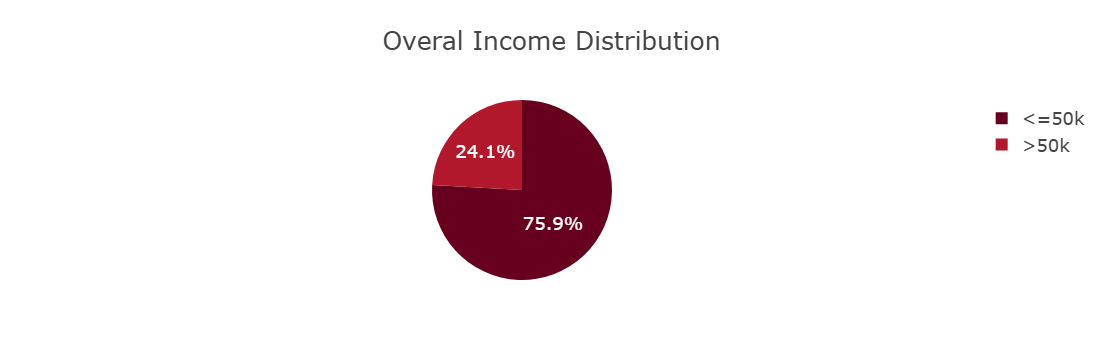

In [73]:
fig = px.pie(adult_df_income, names='income', values='totol', title='Overal Income Distribution', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(template="presentation")
fig.show() 
fig.write_image(os.path.join(result_dir,'income_distribution_pie_chart.jpg'))
fig.write_image(os.path.join(result_dir,'income_distribution_pie_chart.png'))
fig.write_html(os.path.join(result_dir,'income_distribution_pie_chart.html'))

## Income by Age Group

In [16]:
adult_df_income_age =adult_df.groupby(['age_group', 'income']).size().reset_index(name = 'totol_by_age').sort_values(['age_group', 'income'])
adult_df_income_age

,age_group,income,totol_by_age
0,18-25,<=50k,5334
1,18-25,>50k,114
2,26-35,<=50k,6910
3,26-35,>50k,1591
4,36-45,<=50k,5230
5,36-45,>50k,2771
6,46-60,<=50k,4479
7,46-60,>50k,2809
8,61-75,<=50k,1580
9,61-75,>50k,511


In [17]:
totol_per_group = adult_df_income_age.groupby('age_group')['totol_by_age'].transform('sum')
totol_per_group

0     5448
1     5448
2     8501
3     8501
4     8001
5     8001
6     7288
7     7288
8     2091
9     2091
10     240
11     240
12     945
Name: totol_by_age, dtype: int64

In [18]:
total_per_group = adult_df_income_age.groupby('age_group')['totol_by_age'].transform('sum')
adult_df_income_age['percentage'] = (adult_df_income_age['totol_by_age']/total_per_group)*100
adult_df_income_age

,age_group,income,totol_by_age,percentage
0,18-25,<=50k,5334,97.907489
1,18-25,>50k,114,2.092511
2,26-35,<=50k,6910,81.284555
3,26-35,>50k,1591,18.715445
4,36-45,<=50k,5230,65.366829
5,36-45,>50k,2771,34.633171
6,46-60,<=50k,4479,61.457190
7,46-60,>50k,2809,38.542810
8,61-75,<=50k,1580,75.561932
9,61-75,>50k,511,24.438068


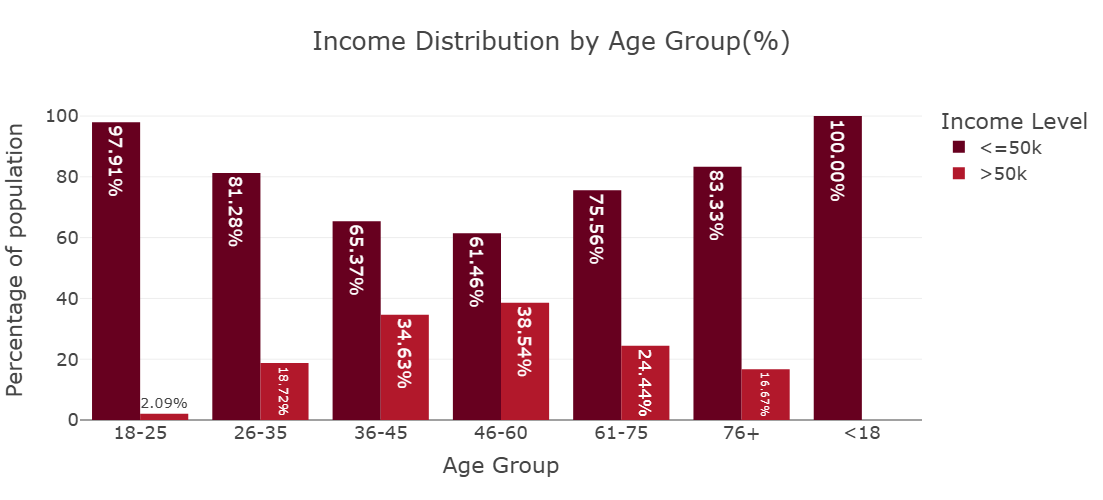

In [72]:
fig = px.bar(
    adult_df_income_age,
    x = 'age_group',
    y = 'percentage',
    color = 'income',
    title='Income Distribution by Age Group(%)',
    barmode='group',
    height=500,
    width=1000,
    color_discrete_sequence=px.colors.sequential.RdBu,
    text='percentage'
)
fig.update_traces(texttemplate = '%{text:.2f}%')
fig.update_layout(template="presentation", xaxis_title='Age Group', yaxis_title='Percentage of population',legend_title=dict(text='Income Level'), paper_bgcolor= "rgba(0,0,0,0)",plot_bgcolor= "rgba(0,0,0,0)")
fig.show()
fig.write_image(os.path.join(result_dir,'income_distribution_by agegroup_bar_plot.jpg'))
fig.write_image(os.path.join(result_dir,'income_distribution_by agegroup_bar_plot.png'))
fig.write_html(os.path.join(result_dir,'income_distribution_by agegroup_bar_plot.html'))

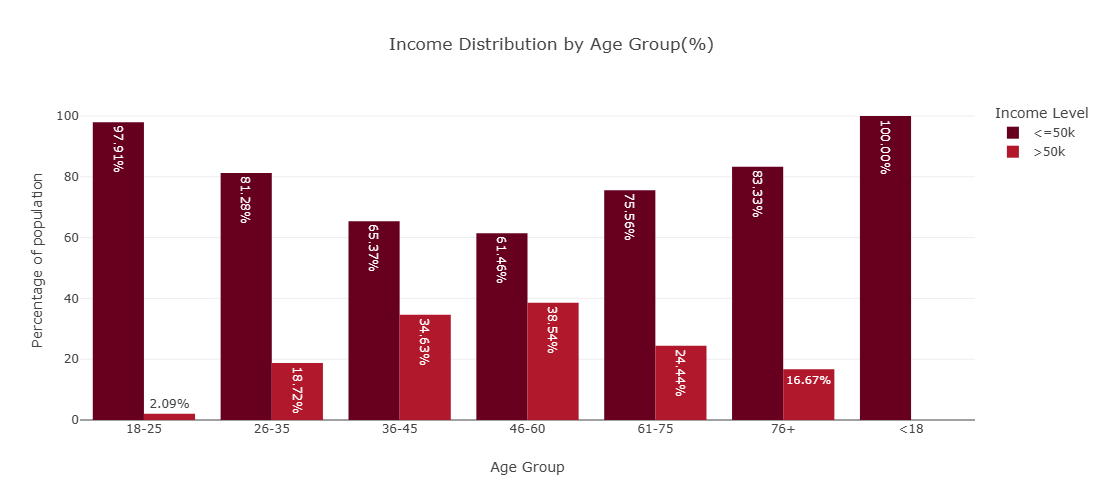

In [64]:
themes = ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white",
         "presentation", "xgridoff", "ygridoff", "gridon", "none"]
for theme in themes:
    fig.update_layout(template=theme)
fig.show()

## Income distribution by native region 

In [26]:
adult_df_income_native_region = adult_df.groupby(['native_region', 'income']).size().reset_index(name='total_income_distr')
adult_df_income_native_region

,native_region,income,total_income_distr
0,asia,<=50k,465
1,asia,>50k,206
2,central america,<=50k,466
3,central america,>50k,58
4,europe,<=50k,369
5,europe,>50k,152
6,north america,<=50k,22769
7,north america,>50k,7250
8,south america,<=50k,174
9,south america,>50k,24


In [27]:
total_per_region = adult_df_income_native_region.groupby('native_region')['total_income_distr'].transform('sum')
adult_df_income_native_region['percentage'] = (adult_df_income_native_region['total_income_distr']/total_per_region) * 100
adult_df_income_native_region

,native_region,income,total_income_distr,percentage
0,asia,<=50k,465,69.299553
1,asia,>50k,206,30.700447
2,central america,<=50k,466,88.931298
3,central america,>50k,58,11.068702
4,europe,<=50k,369,70.825336
5,europe,>50k,152,29.174664
6,north america,<=50k,22769,75.848629
7,north america,>50k,7250,24.151371
8,south america,<=50k,174,87.878788
9,south america,>50k,24,12.121212


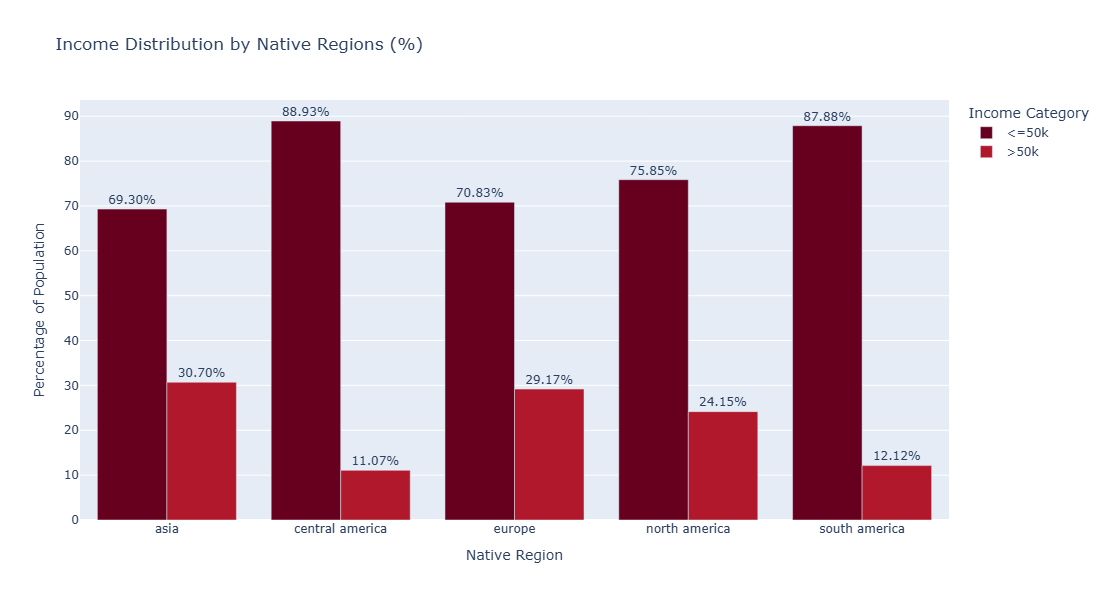

In [30]:
fig = px.bar(
    adult_df_income_native_region,  
    x='native_region',
    y='percentage',
    color='income',
    title='Income Distribution by Native Regions (%)',
    barmode='group',
    height=600,
    width=1000,
    color_discrete_sequence=px.colors.sequential.RdBu,
    text='percentage')

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside') 
fig.update_layout( xaxis_title='Native Region', yaxis_title='Percentage of Population',legend_title='Income Category' )
fig.show()


## Income distribution by race

In [35]:
adult_df_income_race	 = adult_df.groupby(['race', 'income']).size().reset_index(name='total_by_race').sort_values(['race','income'])
adult_df_income_race	

,race,income,total_by_race
0,american indian or eskimo,<=50k,275
1,american indian or eskimo,>50k,36
2,asian or pacific islander,<=50k,762
3,asian or pacific islander,>50k,276
4,black,<=50k,2735
5,black,>50k,387
6,other,<=50k,246
7,other,>50k,25
8,white,<=50k,20660
9,white,>50k,7112


In [37]:
total_per_race = adult_df_income_race.groupby('race')['total_by_race'].transform('sum')
adult_df_income_race['percentage'] = (adult_df_income_race['total_by_race']/total_per_race) * 100
adult_df_income_race

,race,income,total_by_race,percentage
0,american indian or eskimo,<=50k,275,88.424437
1,american indian or eskimo,>50k,36,11.575563
2,asian or pacific islander,<=50k,762,73.410405
3,asian or pacific islander,>50k,276,26.589595
4,black,<=50k,2735,87.604100
5,black,>50k,387,12.395900
6,other,<=50k,246,90.774908
7,other,>50k,25,9.225092
8,white,<=50k,20660,74.391473
9,white,>50k,7112,25.608527


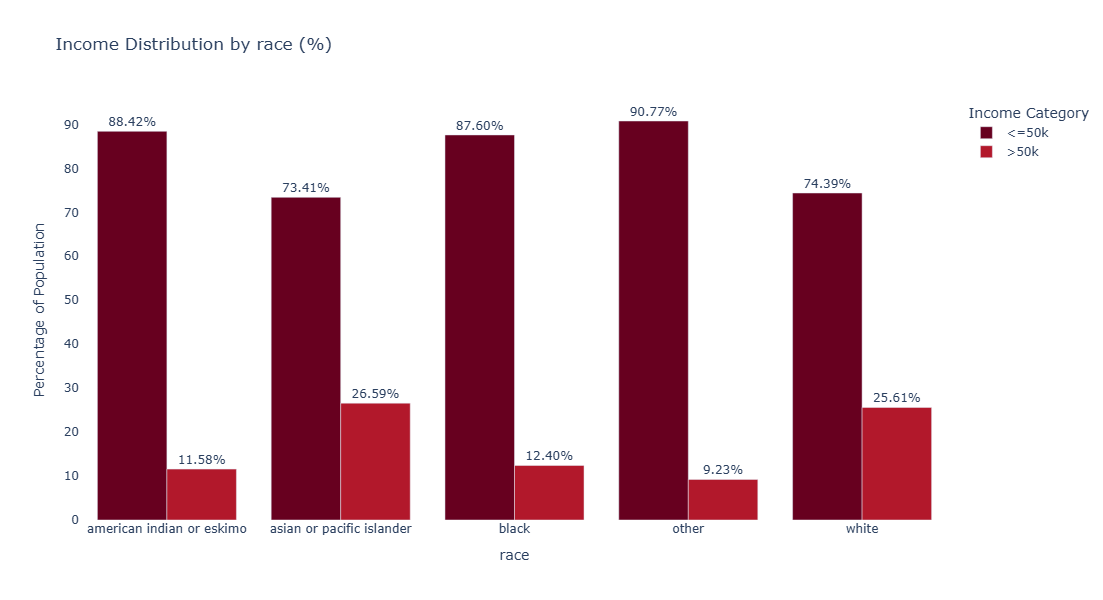

In [71]:
fig = px.bar(
    adult_df_income_race,  
    x='race',
    y='percentage',
    color='income',
    title='Income Distribution by race (%)',
    barmode='group',
    height=600,
    width=1000,
    color_discrete_sequence=px.colors.sequential.RdBu,
    text='percentage')

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside') 
fig.update_layout( xaxis_title='race', yaxis_title='Percentage of Population',legend_title='Income Category',paper_bgcolor= "rgba(0,0,0,0)",plot_bgcolor= "rgba(0,0,0,0)") 
fig.show()
fig.write_image(os.path.join(result_dir,'income_distribution_race_bar_plot.jpg'))
fig.write_image(os.path.join(result_dir,'income_distribution_by race_plot.png'))
fig.write_html(os.path.join(result_dir,'income_distribution_by race_plot.html'))


In [41]:
adult_df_income_edu_occ = (adult_df.groupby(['education_level', 'occupation_grouped','income']).size().reset_index(name='total').sort_values('total',ascending= False))
adult_df_income_edu_occ 

,education_level,occupation_grouped,income,total
6,high school graduate,blue collar,<=50k,3976
43,tertiary,white collar,>50k,3545
42,tertiary,white collar,<=50k,3369
34,some college,white collar,<=50k,3004
11,high school graduate,white collar,<=50k,2900
29,some college,blue collar,<=50k,1503
9,high school graduate,service,<=50k,1444
22,secondary,blue collar,<=50k,1349
4,associate,white collar,<=50k,1015
32,some college,service,<=50k,902


In [42]:
adult_df_income_edu_occ['edu_occ'] = (adult_df_income_edu_occ['education_level'] + "|" + adult_df_income_edu_occ['occupation_grouped'])
adult_df_income_edu_occ

,education_level,occupation_grouped,income,total,edu_occ
6,high school graduate,blue collar,<=50k,3976,high school graduate|blue collar
43,tertiary,white collar,>50k,3545,tertiary|white collar
42,tertiary,white collar,<=50k,3369,tertiary|white collar
34,some college,white collar,<=50k,3004,some college|white collar
11,high school graduate,white collar,<=50k,2900,high school graduate|white collar
29,some college,blue collar,<=50k,1503,some college|blue collar
9,high school graduate,service,<=50k,1444,high school graduate|service
22,secondary,blue collar,<=50k,1349,secondary|blue collar
4,associate,white collar,<=50k,1015,associate|white collar
32,some college,service,<=50k,902,some college|service


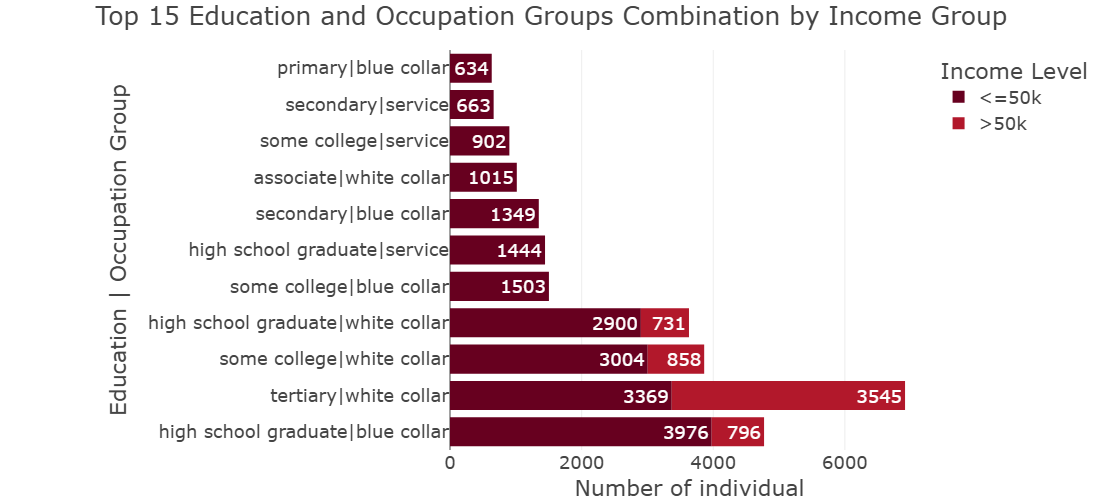

In [70]:
num = 15
adult_df_combos =  adult_df_income_edu_occ.head(num)
fig = px.bar(
    adult_df_combos,
    x='total',
    y='edu_occ',
    color='income',
    orientation = 'h',
    title=f'Top {num} Education and Occupation Groups Combination by Income Group',
    #barmode='group',
    height=500,
    width=1100,
    color_discrete_sequence=px.colors.sequential.RdBu,
    text='total'
)
 
fig.update_layout(template="presentation", 
                  xaxis_title='Number of individual', 
                  yaxis_title='Education | Occupation Group',
                  legend_title=dict(text = 'Income Level'),
                  margin=dict(l=450 ,r=50, t=50, b=50), paper_bgcolor = "rgba(0,0,0,0)", plot_bgcolor = "rgba(0,0,0,0)") 
                  
                 
                  
fig.update_traces(textposition='inside')
fig.show()
fig.write_image(os.path.join(result_dir,'income_distribution_by Educ_occ_plot.jpg'))
fig.write_image(os.path.join(result_dir,'income_distribution_by Educ_occ_plot.png'))
fig.write_html(os.path.join(result_dir,'income_distribution_by Educ_occ_plot.html'))
